TimeVis Plugin System Demonstration
==================
Authors: Ce Gao

Created: 2015-05-27

## 0. Some preparation

In [1]:
%matplotlib inline

## 1. import package

In [2]:
import os
os.chdir('../')
import timevis
from timevis.plugin import Plugin

## 2. Create a customized plugin classes inheritting Plugin base class

In [3]:
class Ext_1(Plugin): pass
class Ext_2(Plugin): pass

## 3. Interactive use of timevis

### 0) Initiate an object

In [4]:
p1 = Ext_1()

### 1) Get Experiment table

In [5]:
p1.experiment.head()

,id,name,user,well
0,1,Exp 1,user1,96


### 2) Get Layout table
The rows are sorted by ``well`` column

In [8]:
p1.layout.sort('well').head()

,eid,lid,fid,pid,layout,factor,well,level
91,1,1,1,1,Layout 1,Doses,A01,42
187,1,1,2,1,Layout 1,Genes,A01,bb
89,1,1,1,1,Layout 1,Doses,A02,42
185,1,1,2,1,Layout 1,Genes,A02,bb
90,1,1,1,1,Layout 1,Doses,A03,42


### 3) Get Plate table
The rows are sorted by ``well``, ``channel`` and ``time`` columns

In [10]:
p1.plate.sort(['well', 'channel', 'time']).head()

,pid,cid,channel,well,time,measure
0,1,1,GFP,A01,00:00:00,3.496714
96,1,1,GFP,A01,00:05:00,4.592241
192,1,1,GFP,A01,00:10:00,5.428187
288,1,1,GFP,A01,00:15:00,6.842976
1,1,1,GFP,A02,00:00:00,2.861736


### 4) Plot time series data for a certain well on the microplate

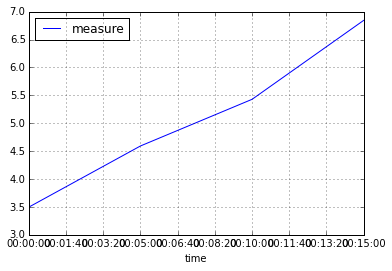

In [11]:
p1.plate[p1.plate.well == 'A01'].plot(x='time', y='measure')

### 5) Plot value distribution for the plate

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4703e459d0>], dtype=object)

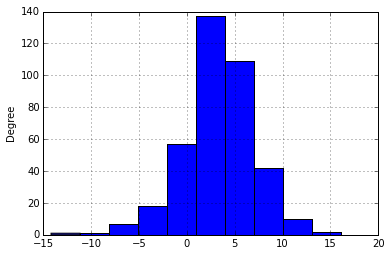

In [13]:
p1.plate.measure.plot(subplots=True, kind='hist')

### 6) Summarize the number of time points for each well

In [15]:
p1.plate.groupby('well').measure.size().head()

well
A01    4
A02    4
A03    4
A04    4
A05    4
dtype: int64

## 4. Plugin detection
The customize plugin classes will be registered and used by TimeVis

In [16]:
timevis.plugin.plugins

{'Ext_1': __main__.Ext_1, 'Ext_2': __main__.Ext_2}